In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi': 600})
# Use valid rcParams keys: set serif family and specify Times New Roman
plt.rcParams.update({'font.family': 'serif', 'font.serif': ['Times New Roman']})
import re
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
data = pd.read_csv('/Users/ainsleylewis/Documents/Astronomy/arXiver/2025_Data.csv')
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,...,journals,num_checks,affiliations,total_citations,non_self_citations,journal_flag,journal_flag_with_submitted,smart_keywords,smart_keywords_2,latex_countries
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,...,"ApJ (2025), 980 183",0,"Wu, John F.: Space Telescope Science Institute...",3.0,1.0,1,1,"['Astronomers', 'Astronomical evolution', 'Ast...","['Galaxies (573)', 'Astronomy image processing...",NaN
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,NaN,0.0,0.0,1,1,"['Accretion', 'Angular distance', 'Bayesian st...",['powered by accretion of matter from a compan...,"United Kingdom, United Kingdom, United Kingdom..."
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,...,NaN,0,"D'Andrea, Matteo: INAF/IAPS, 00133, Rome, Ital...",1.0,0.0,1,1,[],[],NaN
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['Cosmic ray objects', 'Cosmic ray sources', '...","['Cosmic Rays 1', 'HII regions', 'Gamma rays',...","Italy, France"
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,...,NaN,0,"Liu, Jie: Shanghai Astronomical Observatory, C...",4.0,3.0,1,1,"['Disk galaxies', 'Galactic bar', 'Galaxies']",['galaxies: rotation curve - galaxies: fundame...,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18655,Cosmic Himalayas in CROCODILE : Probing the Ex...,The recently reported Cosmic Himalayas (CH) --...,"['Yuto Kuwayama', 'Yongming Liang', 'Kentaro N...",10.0,18.0,5.0,arxiv.org/pdf/2512.24966,Cosmology and Nongalactic Astrophysics,['Astrophysics of Galaxies'],NaN,...,NaN,0,"[None, None, None, None, None, None, None, Non...",0.0,0.0,0,1,"['Apparent anomaly', 'Clustering', 'Cosmologic...",['Hydrodynamicalsimulations(767)'],"Japan, Japan, Japan, Japan, Japan, Japan, Unit..."
18656,Multi-Frequency Study of FRB20201124A with the...,We present results from multi-epoch observatio...,"['C. Dudeja', 'J. Roy', 'U. Panda', 'S. Bhatta...",11.0,17.0,1.0,arxiv.org/pdf/2512.24978,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,"[None, None, None, None]",0.0,0.0,0,0,"['FRB', 'FRBs', 'Fast radio burst']",[],"India, India, India, India"
18657,Distributions of wide binary stars in theory a...,"Using the censored catalog of 103,169 resolved...",['Valeri V. Makarov'],7.0,13.0,1.0,arxiv.org/pdf/2512.25002,Solar and Stellar Astrophysics,NaN,NaN,...,NaN,0,[None],0.0,0.0,1,1,"['A stars', 'A type stars', 'A-type stars']",[],United States
18658,Towards precision cosmology with Voids x CMB c...,We construct and validate a set of multi-purpo...,"['Mar Pérez Sar', 'Carlos Hernández Monteagudo...",8.0,19.0,1.0,arxiv.org/pdf/2512.25040,Cosmology and Nongalactic Astrophysics,NaN,NaN,...,NaN,0,"[None, None, None, None]",0.0,0.0,0,1,"['CMB', 'Catalogs', 'Clustering']",['Cosmology: Large-scale structure - Cosmic mi...,"Spain, Spain, Hungary, Hungary, France, United..."


In [3]:
# Month Column
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month

In [4]:
# Removing numbers in parentheses (e.g. (573)) and brackets
data['keywords'] = data['keywords'].str.replace(r'\(\d+\)', '', regex=True)
data['keywords'] = data['keywords'].str.replace(r'\[\d+\]', '', regex=True)

# Removing list formatting characters like brackets and quotes
data['keywords'] = data['keywords'].str.replace(r"[\[\]']", "", regex=True)

# Cleaning up extra whitespace
data['keywords'] = data['keywords'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Remove the number 1 from q\uantity keywords
data['keywords'] = data['keywords'].str.replace(r'\b1\b', '', regex=True)

# Remove : from keywords
data['keywords'] = data['keywords'].str.replace(':', '', regex=False)

# Separate keywords by sploitting according to ' – ' delimiter
data['keywords'] = data['keywords'].str.replace(' — ', ', ')

In [5]:
# Set empty keywords to NaN
data['keywords'] = data['keywords'].replace('', np.nan)

# Print number of papers with keywords
print(f"Number of papers with keywords: {data['keywords'].notna().sum()}")

Number of papers with keywords: 12753


In [6]:
# Percentage of sample with keywords
percentage_with_keywords = (data['keywords'].notna().sum() / len(data)) * 100
print(f"Percentage of sample with keywords: {percentage_with_keywords:.2f}%")

Percentage of sample with keywords: 68.34%


In [7]:
# Replace same term short forms
data['keywords'] = data['keywords'].str.replace('agn', 'active galactic nuclei', regex=False)
data['keywords'] = data['keywords'].str.replace('binaries', 'binary', regex=False)
data['keywords'] = data['keywords'].str.replace('black hole physics', 'black holes', regex=False)
data['keywords'] = data['keywords'].str.replace('stars binary', 'binary', regex=False) 
data['keywords'] = data['keywords'].str.replace('binaries', 'binary', regex=False)
data['keywords'] = data['keywords'].str.replace('galaxies evolution', 'galaxy evolution', regex=False)

In [27]:
# Replace keyword 
data['keywords'] = data['keywords'].str.replace('methods data analysis', 'data analysis', regex=False)
data['keywords'] = data['keywords'].str.replace('methods numerical', 'numerical methods', regex=False)

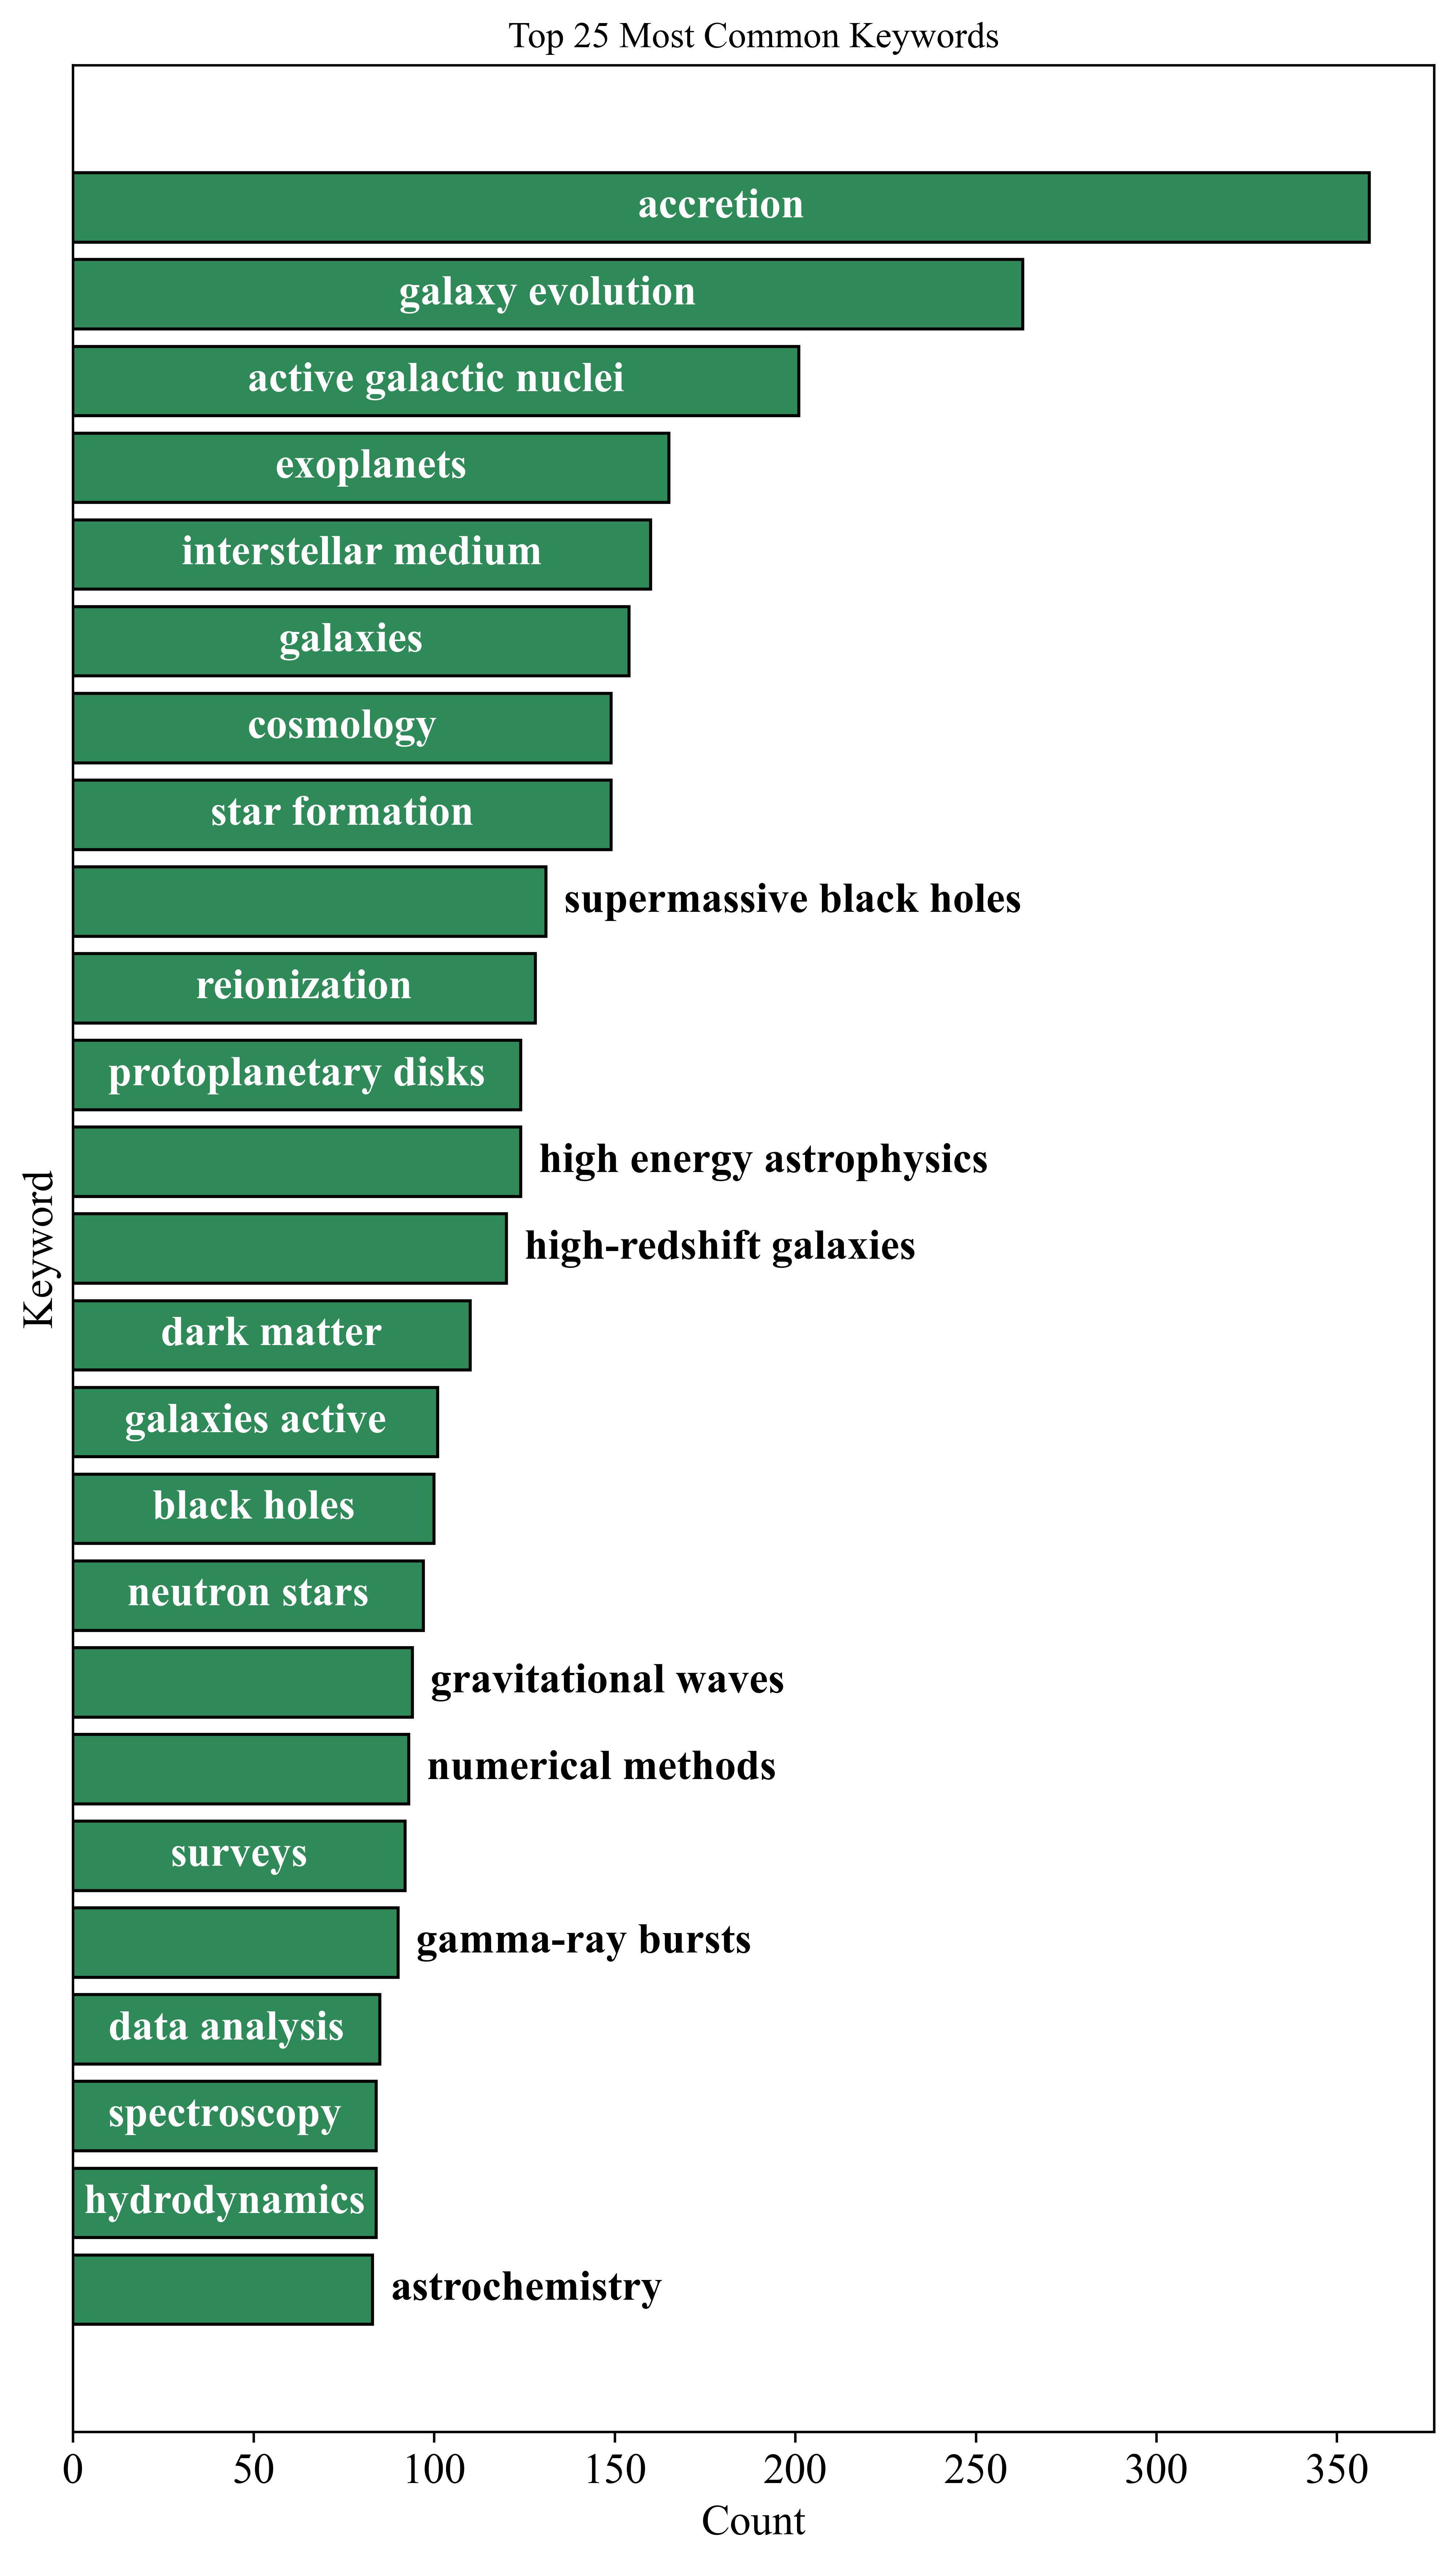

In [61]:
# Most common keywords
all_keywords = []
for keywords in data['keywords'].dropna():
    all_keywords.extend([kw.strip().lower() for kw in keywords.split(',')])
keyword_counts = Counter(all_keywords)
common_keywords = keyword_counts.most_common(25)
common_keywords_df = pd.DataFrame(common_keywords, columns=['Keyword', 'Count'])

plt.figure(figsize=(8, 14))
bars = plt.barh(common_keywords_df['Keyword'], common_keywords_df['Count'], color='seagreen', edgecolor='black')
plt.title('Top 25 Most Common Keywords')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Keyword', fontsize=14)

# Remove y-axis ticks and labels
plt.yticks([]) 
plt.xticks(fontsize=14)
plt.gca().invert_yaxis()

# Add keywords inside or outside the bars depending on length
for bar, keyword in zip(bars, common_keywords_df['Keyword']):
    width = bar.get_width()
    
    # Heuristic: if text length relative to count is too large, put it outside
    # The multiplier '8' is an estimate of char width relative to data units
    if len(keyword) * 6 > width:
        plt.text(width + 5, bar.get_y() + bar.get_height()/2, keyword, 
                 va='center', ha='left', color='black', fontweight='bold', fontsize=14)
    else:
        plt.text(width / 2, bar.get_y() + bar.get_height()/2, keyword, 
                 va='center', ha='center', color='white', fontweight='bold', fontsize=14)

plt.show()

In [29]:
# Removing numbers in parentheses (e.g. (573)) and brackets
data['smart_keywords'] = data['smart_keywords'].str.replace(r'\(\d+\)', '', regex=True)
data['smart_keywords'] = data['smart_keywords'].str.replace(r'\[\d+\]', '', regex=True)

# Removing list formatting characters like brackets and quotes
data['smart_keywords'] = data['smart_keywords'].str.replace(r"[\[\]']", "", regex=True)

# Cleaning up extra whitespace
data['smart_keywords'] = data['smart_keywords'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Remove the number 1 from q\uantity keywords
data['smart_keywords'] = data['smart_keywords'].str.replace(r'\b1\b', '', regex=True)

# Remove : from keywords
data['smart_keywords'] = data['smart_keywords'].str.replace(':', '', regex=False)

In [30]:
# Removing numbers in parentheses (e.g. (573)) and brackets
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(r'\(\d+\)', '', regex=True)
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(r'\[\d+\]', '', regex=True)

# Removing list formatting characters like brackets and quotes
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(r"[\[\]']", "", regex=True)

# Cleaning up extra whitespace
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Remove the number 1 from q\uantity keywords
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(r'\b1\b', '', regex=True)

# Remove : from keywords
data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(':', '', regex=False)

In [31]:
# Replacement dictionary
replacement_dict = {
    'agn': 'active galactic nuclei',
    'black hole physics': 'black holes',
    'black hole': 'black holes',
    'exoplanet' : 'exoplanets',

}

for short_form, full_form in replacement_dict.items():
    data['smart_keywords_2'] = data['smart_keywords_2'].str.replace(rf'\b{short_form}\b', full_form, regex=True)

In [32]:
# Remove empty smart keywords 
data['smart_keywords_2'] = data['smart_keywords_2'].replace('', np.nan)

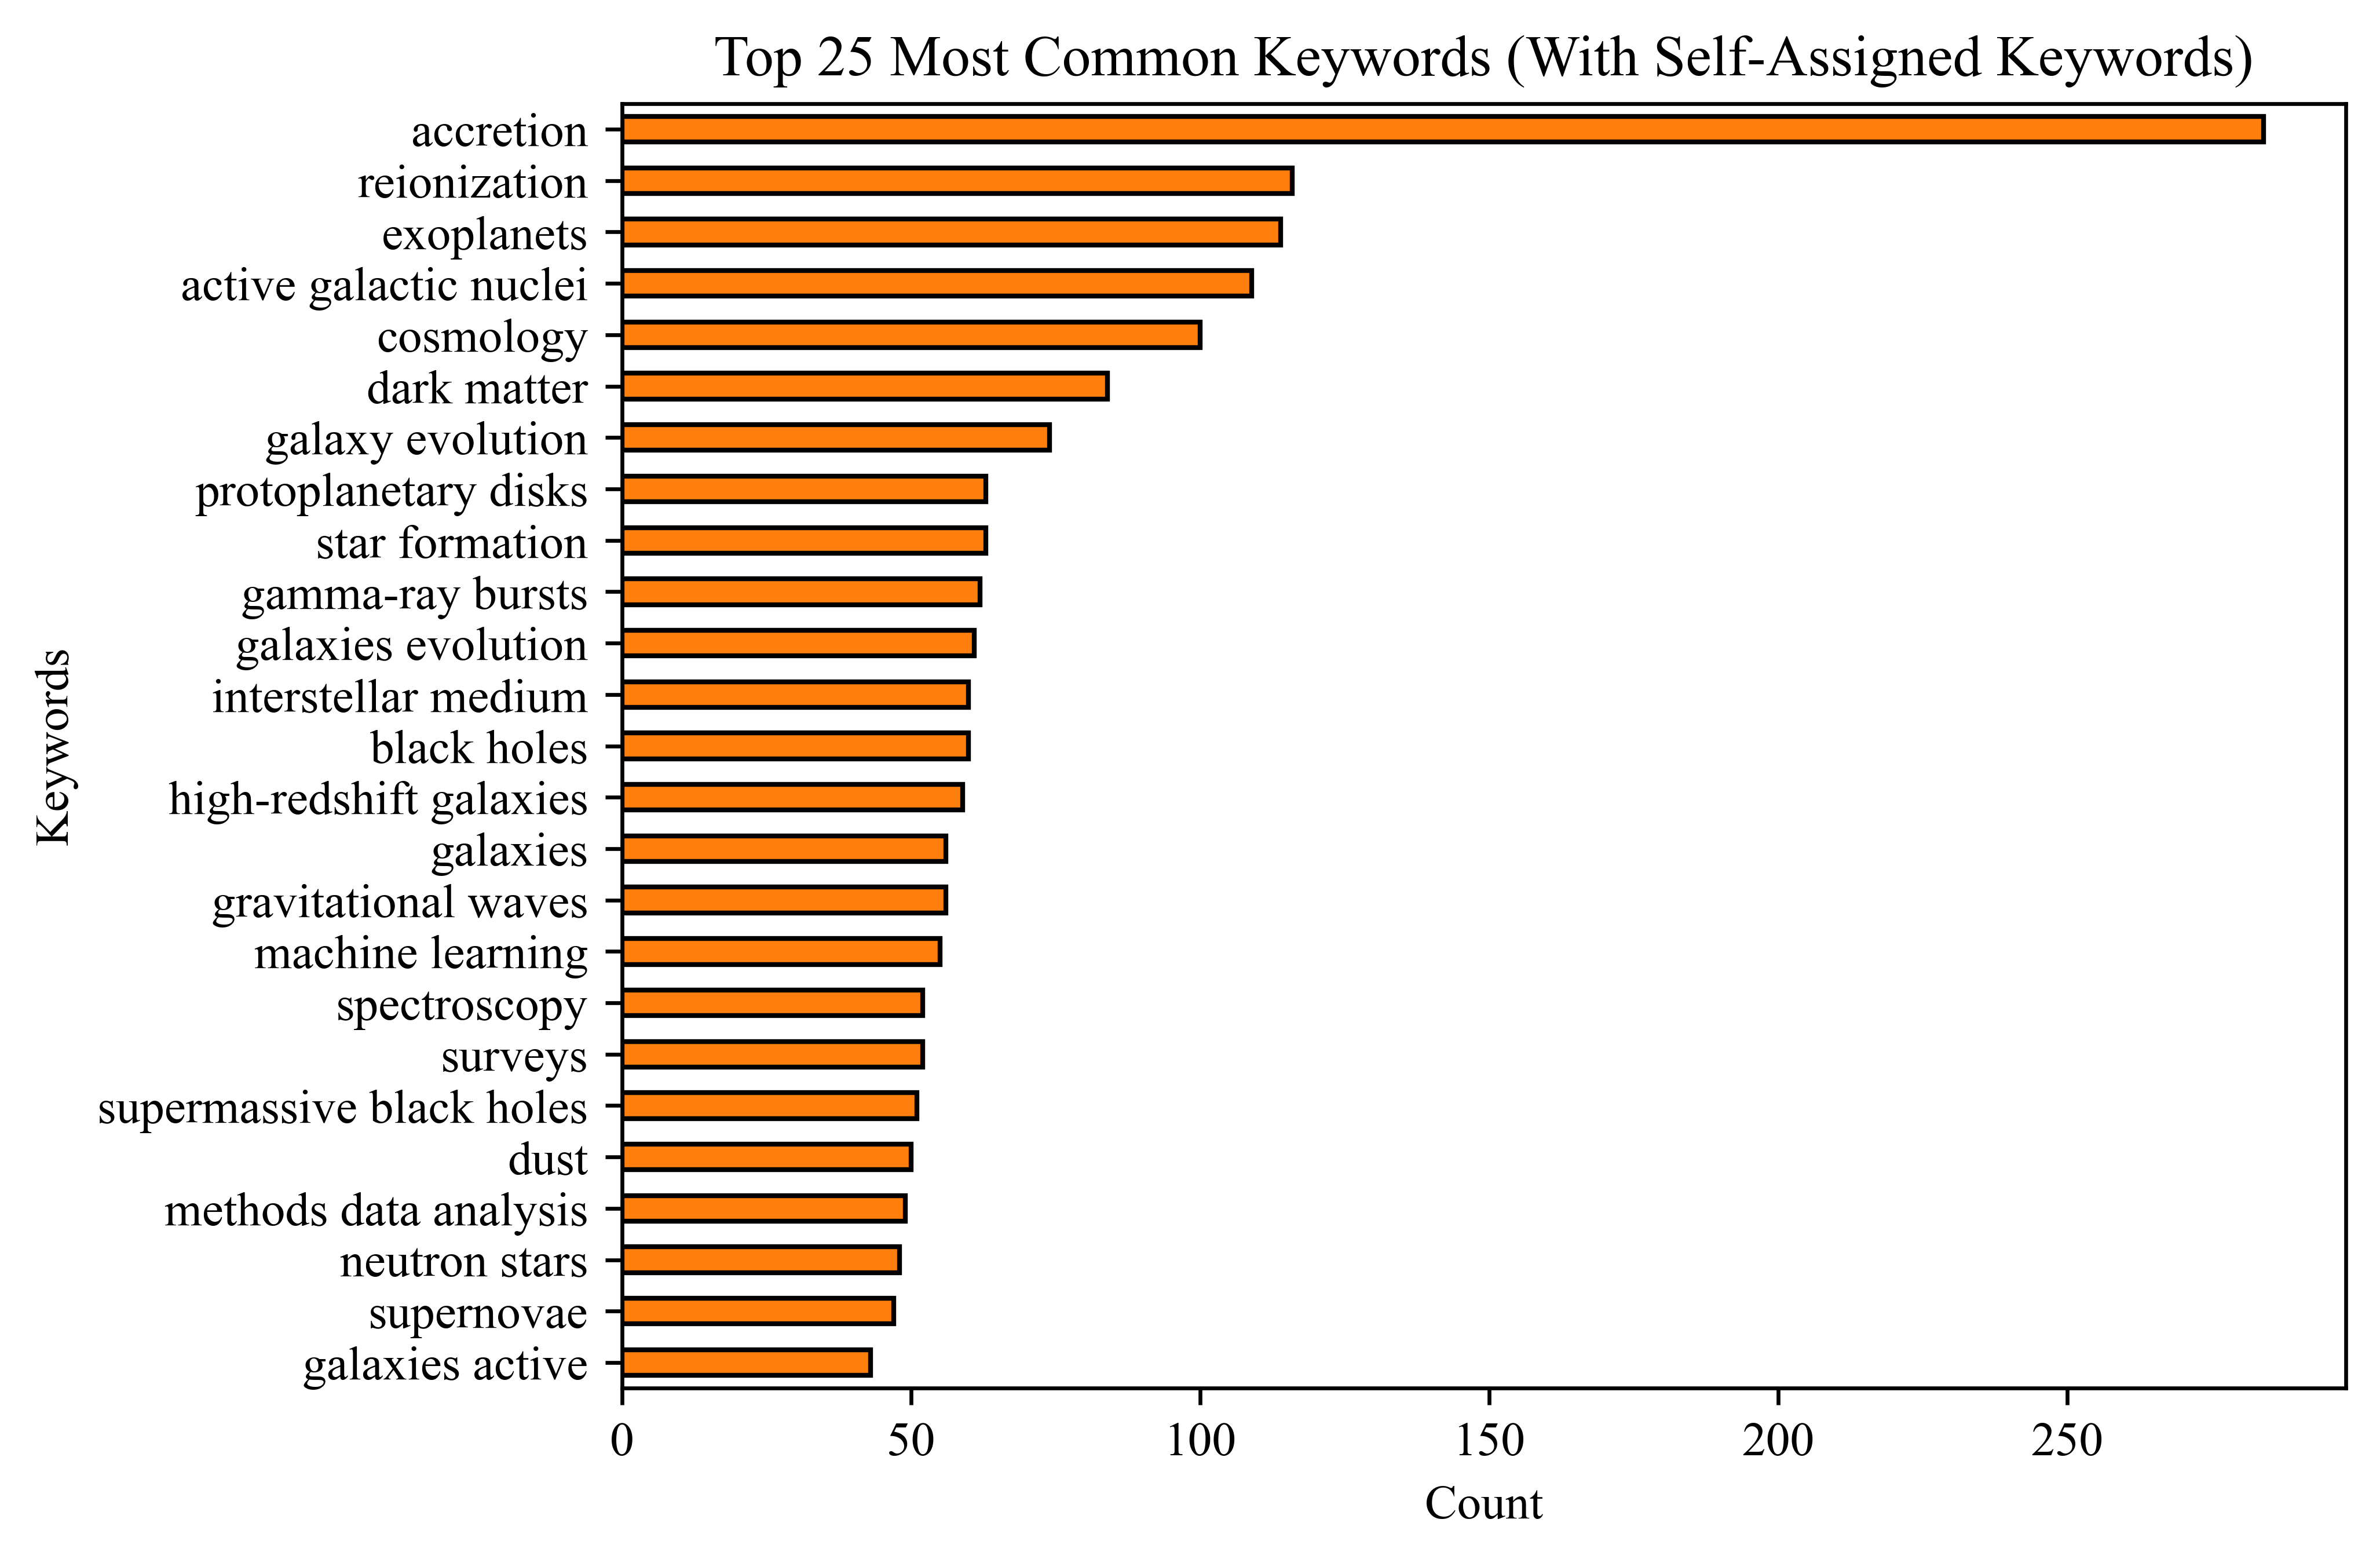

In [33]:
# Most common keywords
all_keywords = []
for keywords in data['smart_keywords_2'].dropna():
    all_keywords.extend([kw.strip().lower() for kw in keywords.split(',')])
keyword_counts = Counter(all_keywords)
common_keywords = keyword_counts.most_common(25)
common_keywords_df = pd.DataFrame(common_keywords, columns=['Keyword', 'Count'])
common_keywords_df.plot(kind='barh', x='Keyword', y='Count', legend=False, color='tab:orange', edgecolor='black')
plt.title('Top 25 Most Common Keywords (With Self-Assigned Keywords)')
plt.xlabel('Count')
plt.ylabel('Keywords')
plt.gca().invert_yaxis()
plt.show()

In [34]:
# Combined Keywords
data['combined_keywords'] = data.apply(lambda row: ', '.join(
    filter(pd.notna, [row['keywords'], row['smart_keywords_2']])), axis=1)

In [35]:
data['combined_keywords'] = data['combined_keywords'].replace('', np.nan)

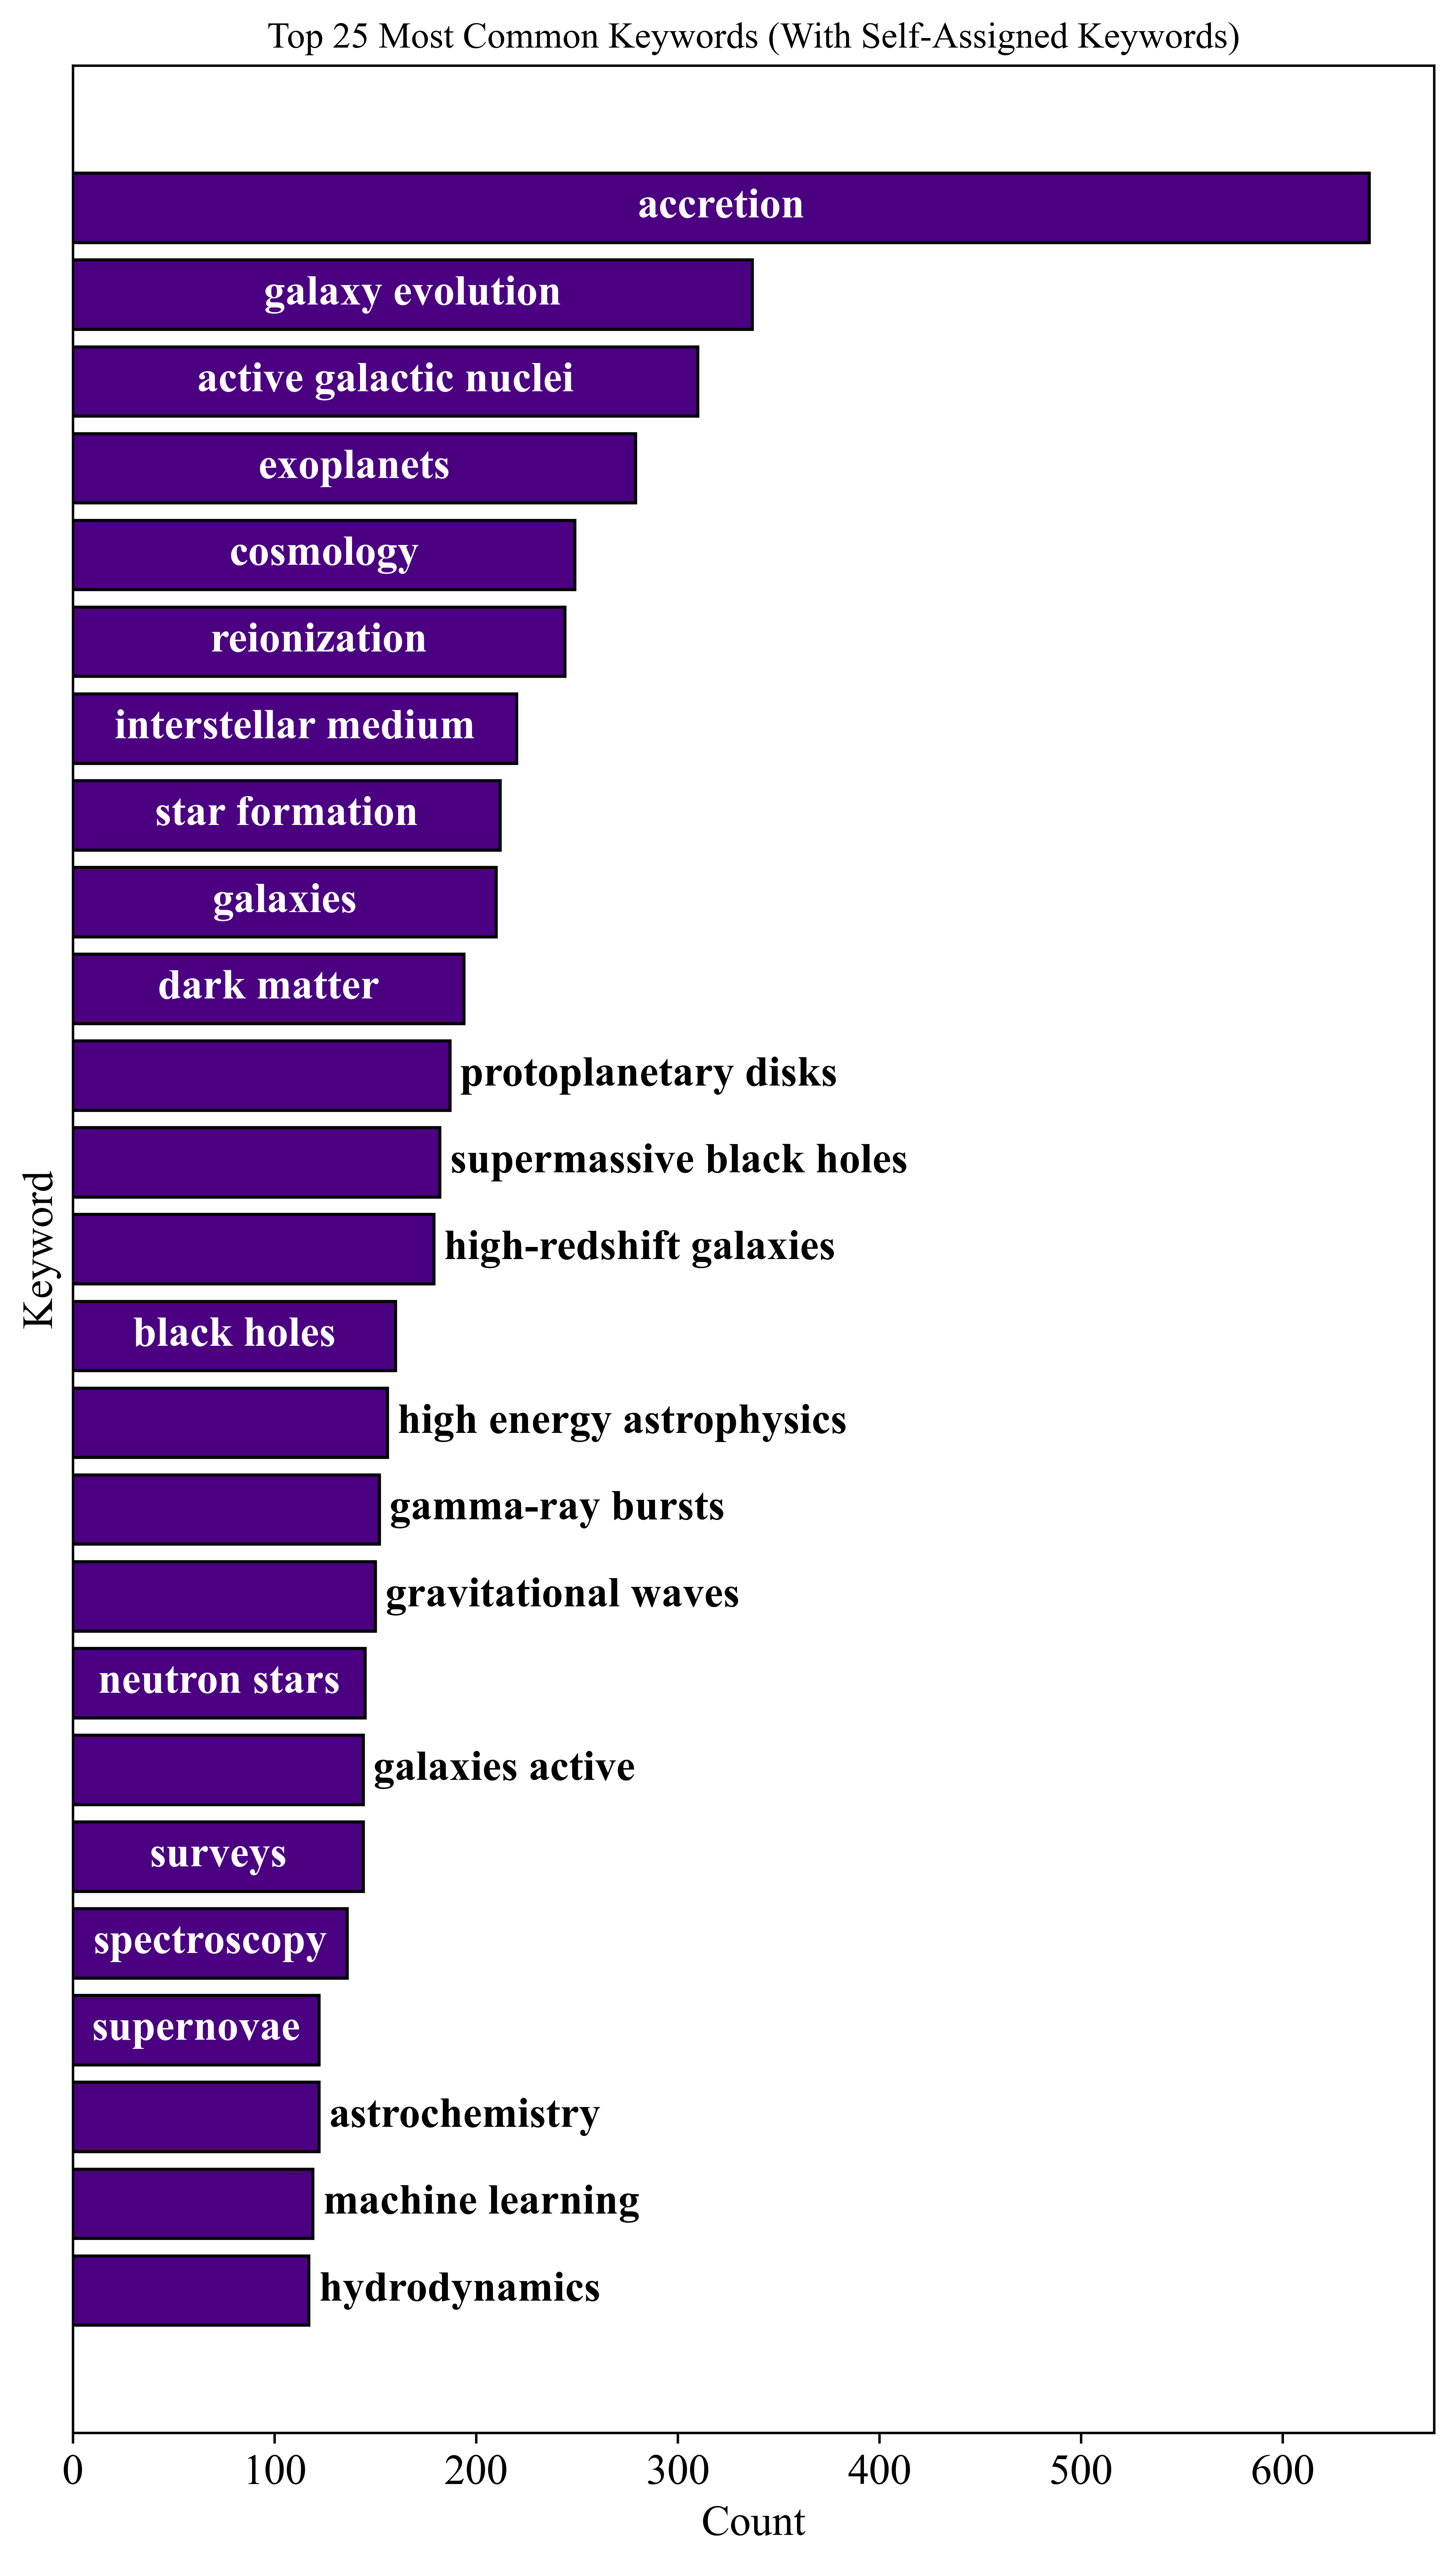

In [56]:
# Most common keywords
all_keywords = []
for keywords in data['combined_keywords'].dropna():
    all_keywords.extend([kw.strip().lower() for kw in keywords.split(',')])
keyword_counts = Counter(all_keywords)
common_keywords = keyword_counts.most_common(25)
common_keywords_df = pd.DataFrame(common_keywords, columns=['Keyword', 'Count'])

plt.figure(figsize=(8, 14))
bars = plt.barh(common_keywords_df['Keyword'], common_keywords_df['Count'], color='indigo', edgecolor='black')
plt.title('Top 25 Most Common Keywords (With Self-Assigned Keywords)')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Keyword', fontsize=14)

# Remove y-axis ticks and labels
plt.yticks([]) 
plt.xticks(fontsize=14)
plt.gca().invert_yaxis()

# Add keywords inside the bars, centered
for bar, keyword in zip(bars, common_keywords_df['Keyword']):
    width = bar.get_width()
    
    # Heuristic: if text length relative to count is too large, put it outside
    # The multiplier '8' is an estimate of char width relative to data units
    if len(keyword) * 10 > width:
        plt.text(width + 5, bar.get_y() + bar.get_height()/2, keyword, 
                 va='center', ha='left', color='black', fontweight='bold', fontsize=14)
    else:
        plt.text(width / 2, bar.get_y() + bar.get_height()/2, keyword, 
                 va='center', ha='center', color='white', fontweight='bold', fontsize=14)

plt.show()

In [63]:
# Keyword with highest Citation per paper (Keywords)
# For all keywords in common_keywords_df, calculate the average citations per paper
keyword_citations = {}
for keyword in common_keywords_df['Keyword']:
    mask = data['keywords'].str.contains(keyword, case=False, na=False)
    total_citations = data.loc[mask, 'total_citations'].sum()
    total_papers = mask.sum()
    if total_papers > 0:
        keyword_citations[keyword] = total_citations / total_papers
# Sort by citation per paper
sorted_keyword_citations = dict(sorted(keyword_citations.items(), key=lambda item: item[1], reverse=True))
# Print top 10 keywords by citation per paper
for keyword, c_per_p in list(sorted_keyword_citations.items())[:25]:
    print(f"{keyword}: {c_per_p:.2f} citations/paper")

high-redshift galaxies: 7.08 citations/paper
reionization: 4.83 citations/paper
supermassive black holes: 3.78 citations/paper
galaxy evolution: 3.59 citations/paper
black holes: 3.53 citations/paper
cosmology: 3.08 citations/paper
protoplanetary disks: 3.02 citations/paper
galaxies: 2.98 citations/paper
surveys: 2.96 citations/paper
galaxies active: 2.77 citations/paper
numerical methods: 2.40 citations/paper
star formation: 2.40 citations/paper
gravitational waves: 2.39 citations/paper
spectroscopy: 2.38 citations/paper
gamma-ray bursts: 2.31 citations/paper
neutron stars: 2.28 citations/paper
astrochemistry: 2.22 citations/paper
dark matter: 2.20 citations/paper
exoplanets: 2.14 citations/paper
accretion: 2.08 citations/paper
interstellar medium: 2.01 citations/paper
hydrodynamics: 1.96 citations/paper
data analysis: 1.88 citations/paper
active galactic nuclei: 1.84 citations/paper
high energy astrophysics: 1.84 citations/paper


In [64]:
# Save as csv
keyword_citations_df = pd.DataFrame(list(sorted_keyword_citations.items()), columns=['Keyword', 'Citations_per_Paper'])
keyword_citations_df['Citations_per_Paper'] = keyword_citations_df['Citations_per_Paper'].round(2)
keyword_citations_df.to_csv('keyword_aac.csv', index=False)

In [65]:
# Keyword with highest Citation per paper (Keywords)
# For all keywords in common_keywords_df, calculate the average citations per paper
masked_data = data['journal_flag'] == 1
masked_data = data[masked_data]
keyword_citations = {}
for keyword in common_keywords_df['Keyword']:
    mask = masked_data['keywords'].str.contains(keyword, case=False, na=False)
    total_citations = masked_data.loc[mask, 'total_citations'].sum()
    total_papers = mask.sum()
    if total_papers > 0:
        keyword_citations[keyword] = total_citations / total_papers
# Sort by citation per paper
sorted_keyword_citations = dict(sorted(keyword_citations.items(), key=lambda item: item[1], reverse=True))
# Print top 10 keywords by citation per paper
for keyword, c_per_p in list(sorted_keyword_citations.items())[:25]:
    print(f"{keyword}: {c_per_p:.2f} citations/paper")

high-redshift galaxies: 8.87 citations/paper
reionization: 6.92 citations/paper
supermassive black holes: 4.19 citations/paper
cosmology: 4.17 citations/paper
black holes: 3.86 citations/paper
galaxy evolution: 3.84 citations/paper
surveys: 3.55 citations/paper
galaxies: 3.30 citations/paper
dark matter: 3.00 citations/paper
numerical methods: 2.92 citations/paper
galaxies active: 2.84 citations/paper
exoplanets: 2.75 citations/paper
gravitational waves: 2.75 citations/paper
spectroscopy: 2.64 citations/paper
star formation: 2.60 citations/paper
gamma-ray bursts: 2.55 citations/paper
protoplanetary disks: 2.52 citations/paper
high energy astrophysics: 2.36 citations/paper
neutron stars: 2.34 citations/paper
hydrodynamics: 2.27 citations/paper
accretion: 2.24 citations/paper
astrochemistry: 2.16 citations/paper
interstellar medium: 2.09 citations/paper
active galactic nuclei: 1.97 citations/paper
data analysis: 1.95 citations/paper


In [66]:
# Save as csv
keyword_citations_df = pd.DataFrame(list(sorted_keyword_citations.items()), columns=['Keyword', 'Citations_per_Paper'])
keyword_citations_df['Citations_per_Paper'] = keyword_citations_df['Citations_per_Paper'].round(2)
keyword_citations_df.to_csv('keyword_jac.csv', index=False)

In [67]:
# Keyword with highest Citation per paper (Keywords)
# For all keywords in common_keywords_df, calculate the average citations per paper
masked_data = data['journal_flag'] == 1
masked_data = data[masked_data]
keyword_citations = {}
for keyword in common_keywords_df['Keyword']:
    mask = masked_data['keywords'].str.contains(keyword, case=False, na=False)
    total_citations = masked_data.loc[mask, 'non_self_citations'].sum()
    total_papers = mask.sum()
    if total_papers > 0:
        keyword_citations[keyword] = total_citations / total_papers
# Sort by citation per paper
sorted_keyword_citations = dict(sorted(keyword_citations.items(), key=lambda item: item[1], reverse=True))
# Print top 10 keywords by citation per paper
for keyword, c_per_p in list(sorted_keyword_citations.items())[:25]:
    print(f"{keyword}: {c_per_p:.2f} citations/paper")

high-redshift galaxies: 6.05 citations/paper
reionization: 4.36 citations/paper
cosmology: 2.88 citations/paper
supermassive black holes: 2.78 citations/paper
black holes: 2.60 citations/paper
galaxy evolution: 2.48 citations/paper
surveys: 2.20 citations/paper
galaxies: 2.15 citations/paper
dark matter: 1.97 citations/paper
gravitational waves: 1.97 citations/paper
exoplanets: 1.96 citations/paper
numerical methods: 1.90 citations/paper
star formation: 1.78 citations/paper
high energy astrophysics: 1.75 citations/paper
neutron stars: 1.74 citations/paper
galaxies active: 1.73 citations/paper
spectroscopy: 1.67 citations/paper
gamma-ray bursts: 1.63 citations/paper
hydrodynamics: 1.60 citations/paper
accretion: 1.50 citations/paper
astrochemistry: 1.47 citations/paper
protoplanetary disks: 1.44 citations/paper
interstellar medium: 1.36 citations/paper
data analysis: 1.30 citations/paper
active galactic nuclei: 1.26 citations/paper


In [68]:
# Save as csv
keyword_citations_df = pd.DataFrame(list(sorted_keyword_citations.items()), columns=['Keyword', 'Citations_per_Paper'])
keyword_citations_df['Citations_per_Paper'] = keyword_citations_df['Citations_per_Paper'].round(2)
keyword_citations_df.to_csv('keyword_ejac.csv', index=False)

In [69]:
keyword_citations = {}
for keyword in common_keywords_df['Keyword']:
    mask = data['keywords'].str.contains(keyword, case=False, na=False)
    total_citations = data.loc[mask, 'non_self_citations'].sum()
    total_papers = mask.sum()
    if total_papers > 0:
        keyword_citations[keyword] = total_citations / total_papers
# Sort by citation per paper
sorted_keyword_citations = dict(sorted(keyword_citations.items(), key=lambda item: item[1], reverse=True))
# Print top 10 keywords by citation per paper
for keyword, c_per_p in list(sorted_keyword_citations.items())[:25]:
    print(f"{keyword}: {c_per_p:.2f} citations/paper")

high-redshift galaxies: 4.55 citations/paper
reionization: 3.03 citations/paper
supermassive black holes: 2.48 citations/paper
black holes: 2.39 citations/paper
galaxy evolution: 2.25 citations/paper
cosmology: 2.10 citations/paper
galaxies: 1.89 citations/paper
surveys: 1.76 citations/paper
neutron stars: 1.75 citations/paper
gravitational waves: 1.72 citations/paper
galaxies active: 1.70 citations/paper
star formation: 1.60 citations/paper
gamma-ray bursts: 1.54 citations/paper
exoplanets: 1.51 citations/paper
numerical methods: 1.51 citations/paper
astrochemistry: 1.50 citations/paper
protoplanetary disks: 1.48 citations/paper
accretion: 1.43 citations/paper
dark matter: 1.42 citations/paper
high energy astrophysics: 1.42 citations/paper
spectroscopy: 1.39 citations/paper
hydrodynamics: 1.37 citations/paper
interstellar medium: 1.30 citations/paper
data analysis: 1.21 citations/paper
active galactic nuclei: 1.21 citations/paper


In [70]:
# Save as csv
keyword_citations_df = pd.DataFrame(list(sorted_keyword_citations.items()), columns=['Keyword', 'Citations_per_Paper'])
keyword_citations_df['Citations_per_Paper'] = keyword_citations_df['Citations_per_Paper'].round(2)
keyword_citations_df.to_csv('keyword_eaac.csv', index=False)

In [71]:
csv_1 = pd.read_csv('keyword_aac.csv')
csv_2 = pd.read_csv('keyword_jac.csv')
csv_3 = pd.read_csv('keyword_ejac.csv')
csv_4 = pd.read_csv('keyword_eaac.csv')

# Merge all CSVs on 'Keyword'
merged_csv = csv_1.merge(csv_2, on='Keyword', suffixes=('_aac', '_jac'))
merged_csv = merged_csv.merge(csv_3, on='Keyword')
merged_csv = merged_csv.merge(csv_4, on='Keyword', suffixes=('_ejac', '_eaac'))

# Save
merged_csv.to_csv('keyword_citations_comparison.csv', index=False)